# Telecom Churn Case Study
With 21 predictor variables we need to predict whether a particular customer will switch to another telecom provider or not. In telecom terminology, this is referred to as churning and not churning, respectively.

In [1]:
import pandas as pd
import numpy as np

In [2]:
churn_data=pd.read_csv('churn_data.csv')
customer_data=pd.read_csv('customer_data.csv')
internet_data=pd.read_csv('internet_data.csv')

In [3]:
churn_data.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
customer_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [5]:
internet_data.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


In [6]:
churn_data.shape

(7043, 9)

In [7]:
customer_data.shape

(7043, 5)

In [8]:
internet_data.shape

(7043, 9)

In [9]:
#Merging all three dataframe on customerID

data=churn_data.merge(customer_data,how='inner',on='customerID')
telecom=data.merge(internet_data,how='inner',on='customerID')

In [10]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No


In [11]:
telecom.shape

(7043, 21)

# Lets understand the data structure 

In [12]:
telecom.describe()

,tenure,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147
std,24.559481,30.090047,0.368612
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
max,72.000000,118.750000,1.000000


In [13]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
dtypes: float64(1), int64(2), obj

In [14]:
telecom.isnull().sum()

customerID          0
tenure              0
PhoneService        0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64

In [15]:
telecom.dtypes['customerID']

dtype('O')

In [16]:
# Lets Study Categorical Variable

cat_col= [x for x in telecom.columns if telecom.dtypes[x]=='object']
cat_col = [x for x in cat_col if x not in(['customerID','TotalCharges'])]

print('Categorical Values:\n')
for i in cat_col:
    print(telecom[i].value_counts())
    print('\n')

Categorical Values:

Yes    6361
No      682
Name: PhoneService, dtype: int64


Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64


Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64


Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


No     5174
Yes    1869
Name: Churn, dtype: int64


Male      3555
Female    3488
Name: gender, dtype: int64


No     3641
Yes    3402
Name: Partner, dtype: int64


No     4933
Yes    2110
Name: Dependents, dtype: int64


No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


No                     3088
Yes  

# Data Cleaning

In [17]:
#Replce all empty values in TotalCharges to NaN so we can convert dtype to float

telecom.loc[telecom['TotalCharges']==' ','TotalCharges']='NaN'

In [18]:
telecom['TotalCharges']=telecom['TotalCharges'].astype('float64')

In [19]:
telecom.describe()

,tenure,MonthlyCharges,TotalCharges,SeniorCitizen
count,7043.000000,7043.000000,7032.000000,7043.000000
mean,32.371149,64.761692,2283.300441,0.162147
std,24.559481,30.090047,2266.771362,0.368612
min,0.000000,18.250000,18.800000,0.000000
25%,9.000000,35.500000,401.450000,0.000000
50%,29.000000,70.350000,1397.475000,0.000000
75%,55.000000,89.850000,3794.737500,0.000000
max,72.000000,118.750000,8684.800000,1.000000


How can tenure minimum value be 0

In [20]:
#Check for null values again
telecom.isnull().sum()

customerID           0
tenure               0
PhoneService         0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
dtype: int64

In [21]:
telecom.loc[telecom['tenure']==0.0]

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
488,4472-LVYGI,0,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No,Female,...,Yes,Yes,No phone service,DSL,Yes,No,Yes,Yes,Yes,No
753,3115-CZMZD,0,Yes,Two year,No,Mailed check,20.25,NaN,No,Male,...,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
936,5709-LVOEQ,0,Yes,Two year,No,Mailed check,80.85,NaN,No,Female,...,Yes,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes
1082,4367-NUYAO,0,Yes,Two year,No,Mailed check,25.75,NaN,No,Male,...,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
1340,1371-DWPAZ,0,No,Two year,No,Credit card (automatic),56.05,NaN,No,Female,...,Yes,Yes,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No
3331,7644-OMVMY,0,Yes,Two year,No,Mailed check,19.85,NaN,No,Male,...,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
3826,3213-VVOLG,0,Yes,Two year,No,Mailed check,25.35,NaN,No,Male,...,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
4380,2520-SGTTA,0,Yes,Two year,No,Mailed check,20.00,NaN,No,Female,...,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
5218,2923-ARZLG,0,Yes,One year,Yes,Mailed check,19.70,NaN,No,Male,...,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
6670,4075-WKNIU,0,Yes,Two year,No,Mailed check,73.35,NaN,No,Female,...,Yes,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No


Rows where tenure is 0 are the rows where TotalCharges is 0

In [22]:
# Check the % of null values

(telecom.isnull().sum()/len(telecom.index))*100

customerID          0.000000
tenure              0.000000
PhoneService        0.000000
Contract            0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      0.000000
TotalCharges        0.156183
Churn               0.000000
gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
MultipleLines       0.000000
InternetService     0.000000
OnlineSecurity      0.000000
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovies     0.000000
dtype: float64

Only 0.15% rows have Null TotalCharges and 0 Tenure.
Lets drop these rows

In [23]:
telecom.dropna(inplace=True)

In [24]:
telecom.isnull().sum()

customerID          0
tenure              0
PhoneService        0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64

# Feature Engineering

## Creating Dummies for Categorical Values

In [25]:
# Map all Yes values to 1 and No to 0 in categorical variables

telecom['PhoneService']=telecom['PhoneService'].map({'Yes':1,'No':0})
telecom['PaperlessBilling']=telecom['PaperlessBilling'].map({'Yes':1,'No':0})
telecom['Churn']=telecom['Churn'].map({'Yes':1,'No':0})
telecom['Partner']=telecom['Partner'].map({'Yes':1,'No':0})
telecom['Dependents']=telecom['Dependents'].map({'Yes':1,'No':0})

In [26]:
## Creating a dummy variable for the variable 'Contract' and dropping the first one.
cont=pd.get_dummies(telecom['Contract'],prefix='Contract',drop_first=True)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,cont],axis=1)


## Creating a dummy variable for the variable 'PaymentMethod' and dropping the first one.
pm=pd.get_dummies(telecom['PaymentMethod'],prefix='PaymentMethod',drop_first=True)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,pm],axis=1)


## Creating a dummy variable for the variable 'gender' and dropping the first one.
gender=pd.get_dummies(telecom['gender'],prefix='gender',drop_first=True)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,gender],axis=1)


## Creating a dummy variable for the variable 'MultipleLines'.
ml=pd.get_dummies(telecom['MultipleLines'],prefix='MultipleLines')
ml=ml.drop(['MultipleLines_No phone service'],axis=1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,ml],axis=1)



## Creating a dummy variable for the variable 'InternetService' and dropping the first one.
isr=pd.get_dummies(telecom['InternetService'],prefix='InternetService',drop_first=True)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,isr],axis=1)


## Creating a dummy variable for the variable 'OnlineSecurity'.
os=pd.get_dummies(telecom['OnlineSecurity'],prefix='OnlineSecurity')
os=os.drop(['OnlineSecurity_No internet service'],axis=1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,os],axis=1)


## Creating a dummy variable for the variable 'OnlineBackup'.
ob=pd.get_dummies(telecom['OnlineBackup'],prefix='OnlineBackup')
ob=ob.drop(['OnlineBackup_No internet service'],axis=1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,ob],axis=1)


## Creating a dummy variable for the variable 'DeviceProtection'.
dp=pd.get_dummies(telecom['DeviceProtection'],prefix='DeviceProtection')
dp=dp.drop(['DeviceProtection_No internet service'],axis=1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,dp],axis=1)



## Creating a dummy variable for the variable 'TechSupport'.
ts=pd.get_dummies(telecom['TechSupport'],prefix='TechSupport')
ts=ts.drop(['TechSupport_No internet service'],axis=1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,ts],axis=1)



## Creating a dummy variable for the variable 'StreamingTV'.
stv=pd.get_dummies(telecom['StreamingTV'],prefix='StreamingTV')
stv=stv.drop(['StreamingTV_No internet service'],axis=1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,stv],axis=1)


## Creating a dummy variable for the variable 'StreamingMovies'.
stm=pd.get_dummies(telecom['StreamingMovies'],prefix='StreamingMovies')
stm=stm.drop(['StreamingMovies_No internet service'],axis=1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,stm],axis=1)

In [27]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.50,0,Male,...,1,0,0,1,1,0,1,0,1,0
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,0,1,1,0,1,0,1,0,1,0
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,1,0,0,1,0,1,1,0,1,0
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,1,0,1,0,1,0,1,0,1,0


### Dropping Repeated Columns for which dummy has been created

In [28]:
telecom=telecom.drop(['Contract', 'PaymentMethod', 'gender', 'MultipleLines', 'InternetService', 'OnlineSecurity',
                      'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'],axis=1)

In [29]:
telecom.shape

(7032, 32)

In [30]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 32 columns):
customerID                               7032 non-null object
tenure                                   7032 non-null int64
PhoneService                             7032 non-null int64
PaperlessBilling                         7032 non-null int64
MonthlyCharges                           7032 non-null float64
TotalCharges                             7032 non-null float64
Churn                                    7032 non-null int64
SeniorCitizen                            7032 non-null int64
Partner                                  7032 non-null int64
Dependents                               7032 non-null int64
Contract_One year                        7032 non-null uint8
Contract_Two year                        7032 non-null uint8
PaymentMethod_Credit card (automatic)    7032 non-null uint8
PaymentMethod_Electronic check           7032 non-null uint8
PaymentMethod_Mailed check        

### Check for Outliers

In [31]:
num_tel=telecom[['tenure','MonthlyCharges','TotalCharges']]
num_tel.describe(percentiles=np.arange(0,1,0.1))


,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
0%,1.000000,18.250000,18.800000
10%,2.000000,20.050000,84.600000
20%,6.000000,25.050000,267.070000
30%,12.000000,45.900000,551.995000
40%,20.000000,58.920000,944.170000
50%,29.000000,70.350000,1397.475000


From the distribution we can say that there is no outlier

## Feature Standardization

In [32]:
#Normalising Continous variables

df=telecom[['tenure','MonthlyCharges','TotalCharges']]
df_norm = (df-df.mean())/df.std()

In [33]:
df_norm.head()

,tenure,MonthlyCharges,TotalCharges
0,-1.280157,-1.161611,-0.994123
1,0.064298,-0.260859,-0.173727
2,-1.239416,-0.363897,-0.959581
3,0.512450,-0.747797,-0.195234
4,-1.239416,0.196164,-0.940391


In [34]:
df_norm.mean()

tenure           -1.028756e-16
MonthlyCharges   -1.356108e-15
TotalCharges     -1.724951e-15
dtype: float64

In [35]:
telecom=telecom.drop(['tenure','MonthlyCharges','TotalCharges'],axis=1)

In [36]:
telecom=pd.concat([telecom,df_norm],axis=1)

In [37]:
telecom.head()

,customerID,PhoneService,PaperlessBilling,Churn,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),...,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,tenure,MonthlyCharges,TotalCharges
0,7590-VHVEG,0,1,0,0,1,0,0,0,0,...,0,1,0,1,0,1,0,-1.280157,-1.161611,-0.994123
1,5575-GNVDE,1,0,0,0,0,0,1,0,0,...,1,1,0,1,0,1,0,0.064298,-0.260859,-0.173727
2,3668-QPYBK,1,1,1,0,0,0,0,0,0,...,0,1,0,1,0,1,0,-1.239416,-0.363897,-0.959581
3,7795-CFOCW,0,0,0,0,0,0,1,0,0,...,1,0,1,1,0,1,0,0.512450,-0.747797,-0.195234
4,9237-HQITU,1,1,1,0,0,0,0,0,0,...,0,1,0,1,0,1,0,-1.239416,0.196164,-0.940391


### Churn Rate

In [38]:
(telecom.loc[telecom['Churn']==1]['customerID'].count()/len(telecom.index))*100

26.578498293515356

In [39]:
sum(telecom['Churn'])/len(telecom.index)

0.26578498293515357

# Model Building

### Split the dataset in to train & test 

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
# Putting Features in X
X=telecom.drop(['customerID','Churn'],axis=1)

#Putting response variable in Y
y=telecom['Churn']

In [42]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size = 0.30, random_state=100, stratify=y)

### Running first model

In [43]:
import statsmodels.api as sm

In [44]:
# Logistic Regression Model

logm1=sm.GLM(y_train,sm.add_constant(X_train),family=sm.families.Binomial())
logm1.fit().summary()

c:\users\rajin\appdata\local\programs\python\python37-32\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4898
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2030.7
Date:                Thu, 28 May 2020   Deviance:                       4061.4
Time:                        16:22:05   Pearson chi2:                 5.89e+03
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -2.7174      1.194     -2.276      0.023      -5.058      -0.377
PhoneService                              0.4535      0.590      0.769      0.442      -0.703       1.610
PaperlessBilling                          0.3513      0.090      3.909      0.000       0.175       0.527
SeniorCitizen                             0.1997      0.102      1.966      0.049       0.001       0.399
Partner                                   0.0443      0.092      0.482      0.630      -0.136       0.225
Dependents                               -0.1522      0.107     -1.427      0.154      -0.361       0.057
Contract_One year                        -0.6271      0.126     -4.973      0.000      -0.874      -0.380
Contract_Two year                        -1.5547      0.216     -7.182      0.000      -1.979      -1.130
PaymentMethod_Credit card (automatic)    -0.0581      0.138     -0.422      0.673      -0.328       0.212
PaymentMethod_Electronic check            0.2702      0.113      2.392      0.017       0.049       0.492
PaymentMethod_Mailed check               -0.0387      0.137     -0.282      0.778      -0.308       0.230
gender_Male                               0.0921      0.077      1.189      0.234      -0.060       0.244
MultipleLines_No                          0.0065      0.205      0.032      0.975      -0.394       0.407
MultipleLines_Yes                         0.4470      0.394      1.134      0.257      -0.326       1.220
InternetService_Fiber optic               2.1961      0.975      2.253      0.024       0.285       4.107
InternetService_No                       -2.7762      1.331     -2.085      0.037      -5.386      -0.167
OnlineSecurity_No                         0.1232      0.058      2.136      0.033       0.010       0.236
OnlineSecurity_Yes                       -0.0644      0.174     -0.370      0.711      -0.405       0.276
OnlineBackup_No                          -0.0419      0.054     -0.770      0.441      -0.148       0.065
OnlineBackup_Yes                          0.1006      0.173      0.582      0.561      -0.238       0.440
DeviceProtection_No                      -0.0824      0.055     -1.485      0.137      -0.191       0.026
DeviceProtection_Yes                      0.1412      0.174      0.813      0.416      -0.199       0.481
TechSupport_No                            0.1136      0.059      1.919      0.055      -0.002       0.230
TechSupport_Yes                          -0.0548      0.176     -0.311      0.756      -0.400       0.290
StreamingTV_No                           -0.3693      0.134     -2.749      0.006      -0.633      -0.106
StreamingTV_Yes                           0.4281      0.269      1.594      0.111      -0.098       0.955
Streaming

### Check correlation between variables

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

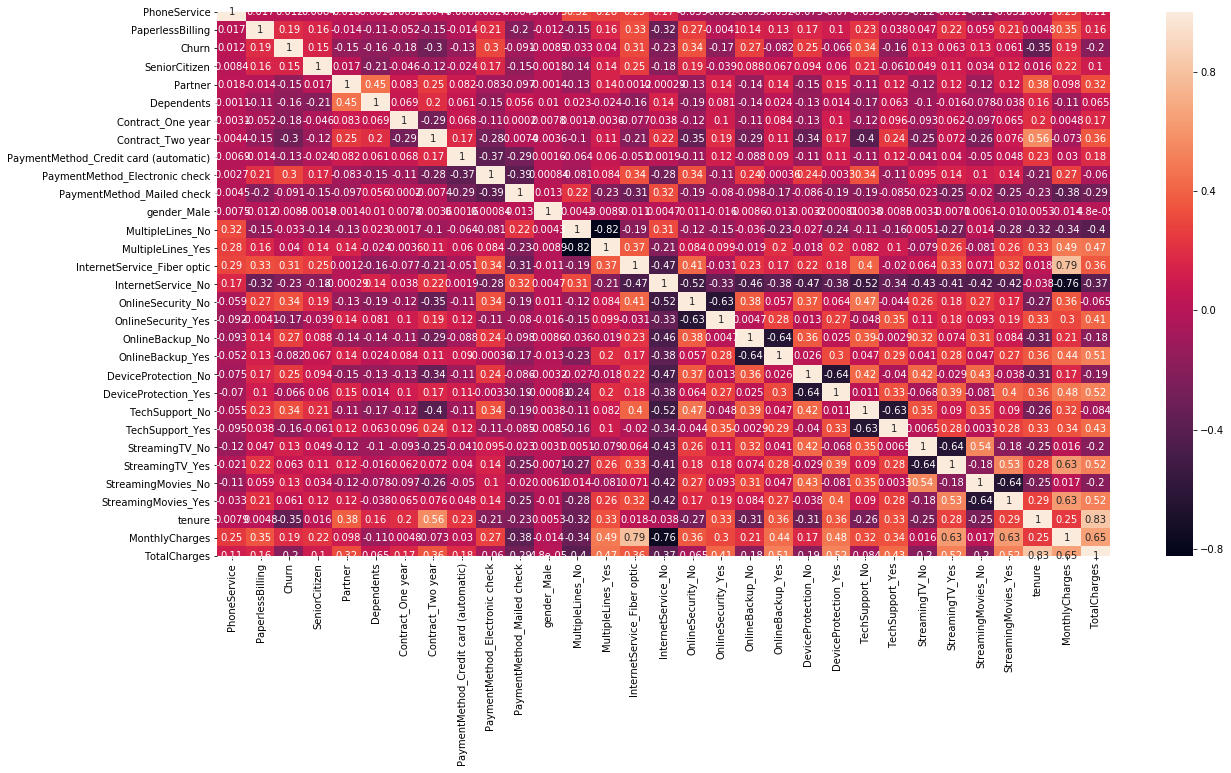

In [46]:
plt.figure(figsize=(20,10))
sns.heatmap(telecom.corr(),annot=True)

### Dropping the columns with high correlation

In [47]:
# Drop the columns with high correlation
X_train2=X_train.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No',
                       'StreamingTV_No','StreamingMovies_No'],axis=1)
X_test2=X_test.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No',
                       'StreamingTV_No','StreamingMovies_No'],axis=1)

### Check the correlation matrix again

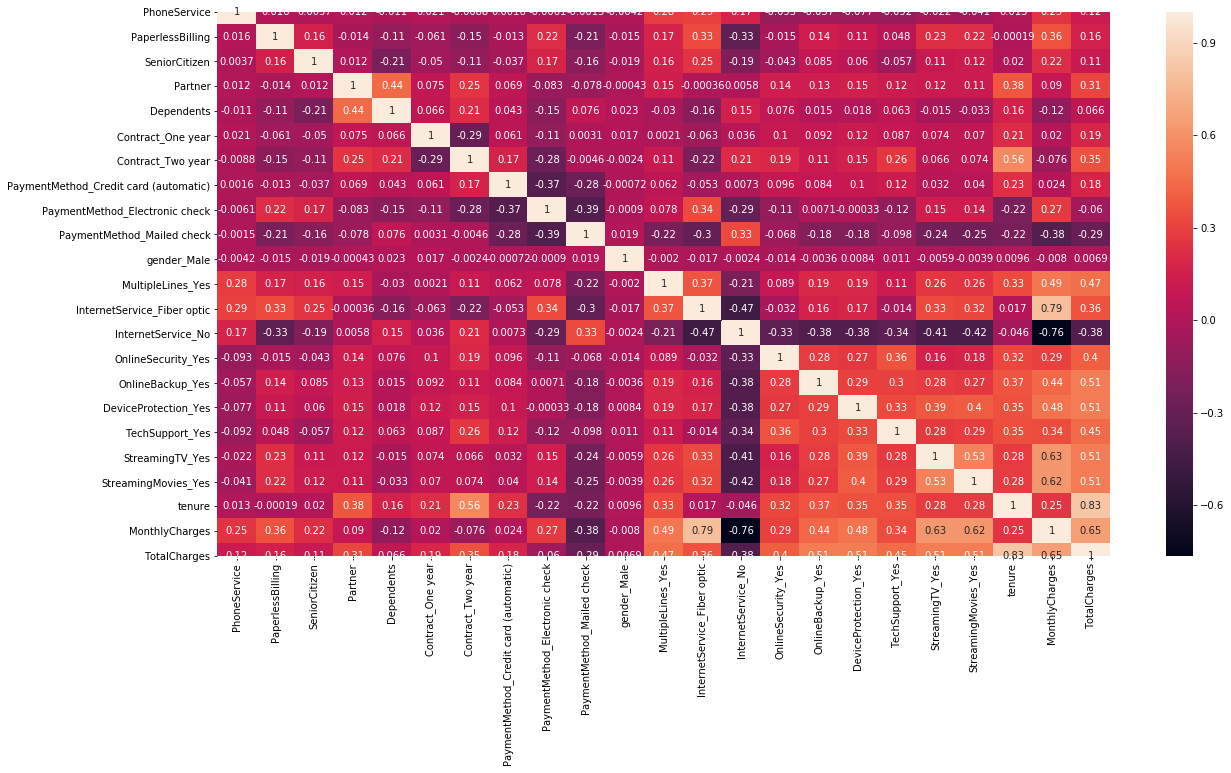

In [48]:
plt.figure(figsize=(20,10))
sns.heatmap(X_train2.corr(),annot=True)

## Re-running the Model

In [49]:
logm2=sm.GLM(y_train,sm.add_constant(X_train2),family=sm.families.Binomial())
logm2.fit().summary()

c:\users\rajin\appdata\local\programs\python\python37-32\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4898
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2030.7
Date:                Thu, 28 May 2020   Deviance:                       4061.3
Time:                        16:22:15   Pearson chi2:                 5.91e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -3.3770      1.566     -2.157      0.031      -6.446      -0.308
PhoneService                              0.4624      0.795      0.582      0.561      -1.096       2.021
PaperlessBilling                          0.3519      0.090      3.901      0.000       0.175       0.529
SeniorCitizen                             0.1999      0.102      1.963      0.050       0.000       0.400
Partner                                   0.0445      0.092      0.482      0.630      -0.136       0.225
Dependents                               -0.1527      0.107     -1.423      0.155      -0.363       0.058
Contract_One year                        -0.6283      0.127     -4.948      0.000      -0.877      -0.379
Contract_Two year                        -1.5608      0.224     -6.957      0.000      -2.001      -1.121
PaymentMethod_Credit card (automatic)    -0.0585      0.138     -0.423      0.672      -0.329       0.212
PaymentMethod_Electronic check            0.2704      0.113      2.391      0.017       0.049       0.492
PaymentMethod_Mailed check               -0.0392      0.137     -0.285      0.776      -0.309       0.230
gender_Male                               0.0921      0.078      1.186      0.236      -0.060       0.244
MultipleLines_Yes                         0.4412      0.217      2.037      0.042       0.017       0.866
InternetService_Fiber optic               2.1986      0.981      2.242      0.025       0.276       4.121
InternetService_No                       -2.1239      0.989     -2.147      0.032      -4.063      -0.185
OnlineSecurity_Yes                       -0.1894      0.217     -0.871      0.384      -0.615       0.237
OnlineBackup_Yes                          0.1423      0.214      0.665      0.506      -0.277       0.562
DeviceProtection_Yes                      0.2240      0.216      1.039      0.299      -0.199       0.647
TechSupport_Yes                          -0.1686      0.221     -0.761      0.446      -0.603       0.265
StreamingTV_Yes                           0.7990      0.402      1.986      0.047       0.010       1.588
StreamingMovies_Yes                       0.8545      0.400      2.138      0.033       0.071       1.638
tenure                                   -1.5018      0.185     -8.104      0.000      -1.865      -1.139
MonthlyCharges                           -1.7432      1.173     -1.486      0.137      -4.042       0.555
TotalCharges                              0.7611      0.194      3.927      0.000       0.381       1.141
=========================================================================================================
"""

### Feature Selection using RFE

In [50]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

rfe=RFE(LogisticRegression(),n_features_to_select=13)

rfe.fit(X_train2,y_train)

print(rfe.support_)
print(rfe.ranking_)


[ True  True False False False  True  True False  True False False False
  True  True  True False False  True  True  True  True False  True]
[ 1  1  4  8  5  1  1  9  1 11  7  3  1  1  1  6 10  1  1  1  1  2  1]


In [51]:
X_train2.columns[rfe.support_]

Index(['PhoneService', 'PaperlessBilling', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Electronic check',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes', 'tenure', 'TotalCharges'],
      dtype='object')

In [52]:
# Variables selected by RFE

col=['PhoneService', 'PaperlessBilling', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Electronic check',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes', 'tenure', 'TotalCharges']

### Re run model with these variables

In [53]:
logm3=sm.GLM(y_train,sm.add_constant(X_train[col]),family=sm.families.Binomial())
logm3.fit().summary()

c:\users\rajin\appdata\local\programs\python\python37-32\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4908
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2039.2
Date:                Thu, 28 May 2020   Deviance:                       4078.4
Time:                        16:22:17   Pearson chi2:                 5.98e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -1.0936      0.166     -6.600      0.000      -1.418      -0.769
PhoneService                      -0.6547      0.156     -4.207      0.000      -0.960      -0.350
PaperlessBilling                   0.3627      0.090      4.050      0.000       0.187       0.538
Contract_One year                 -0.6864      0.125     -5.472      0.000      -0.932      -0.441
Contract_Two year                 -1.6211      0.223     -7.270      0.000      -2.058      -1.184
PaymentMethod_Electronic check     0.3216      0.083      3.892      0.000       0.160       0.484
InternetService_Fiber optic        0.8106      0.116      6.984      0.000       0.583       1.038
InternetService_No                -0.6732      0.159     -4.229      0.000      -0.985      -0.361
OnlineSecurity_Yes                -0.4967      0.102     -4.881      0.000      -0.696      -0.297
TechSupport_Yes                   -0.4846      0.104     -4.678      0.000      -0.688      -0.282
StreamingTV_Yes                    0.2142      0.098      2.196      0.028       0.023       0.405
StreamingMovies_Yes                0.2877      0.097      2.964      0.003       0.097       0.478
tenure                            -1.4608      0.181     -8.079      0.000      -1.815      -1.106
TotalCharges                       0.7359      0.186      3.960      0.000       0.372       1.100
==================================================================================================
"""

### Calculate Variance Inflation Factor (VIF)

In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [55]:
vif=pd.DataFrame()
vif['VIF Factor']=[variance_inflation_factor(telecom[col].values,i) for i in range(len(col))]
vif['feature']=col

In [56]:
vif.sort_values(by='VIF Factor',ascending=False)

,VIF Factor,feature
0,7.774304,PhoneService
12,7.676921,TotalCharges
11,6.736235,tenure
5,3.978521,InternetService_Fiber optic
3,3.274683,Contract_Two year
6,3.222014,InternetService_No
1,2.709627,PaperlessBilling
9,2.671564,StreamingTV_Yes
10,2.671052,StreamingMovies_Yes
8,2.032216,TechSupport_Yes


In [57]:
# Dropping PhoneService due to high VIF

col=['PaperlessBilling', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Electronic check',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes', 'tenure', 'TotalCharges']

In [58]:
#Recalculating VIF
vif=pd.DataFrame()
vif['VIF Factor']=[variance_inflation_factor(telecom[col].values,i) for i in range(len(col))]
vif['feature']=col
vif.sort_values(by='VIF Factor',ascending=False)

,VIF Factor,feature
11,7.655547,TotalCharges
10,6.636091,tenure
2,3.112641,Contract_Two year
4,2.859520,InternetService_Fiber optic
8,2.656684,StreamingTV_Yes
9,2.656078,StreamingMovies_Yes
0,2.520716,PaperlessBilling
5,2.260637,InternetService_No
7,1.948667,TechSupport_Yes
3,1.868322,PaymentMethod_Electronic check


In [59]:
# Lets run the model with selected features

from sklearn.linear_model import LogisticRegression

logsk=LogisticRegression()
logsk.fit(X_train[col],y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [60]:
logsk.score(X_test[col],y_test)

0.8018957345971564

## Making Prediction

In [61]:
# Predicting Probability
y_pred=logsk.predict_proba(X_test[col])

In [62]:
y_pred_df=pd.DataFrame(y_pred)

In [63]:
y_pred_df.head()

,0,1
0,0.725617,0.274383
1,0.819609,0.180391
2,0.725497,0.274503
3,0.790854,0.209146
4,0.187324,0.812676


In [64]:
y_pred_1=y_pred_df[[1]]

In [65]:
y_pred_1.head()

,1
0,0.274383
1,0.180391
2,0.274503
3,0.209146
4,0.812676


In [66]:
 y_test.head()

6943    1
6698    0
5615    1
4112    0
5354    0
Name: Churn, dtype: int64

In [67]:
y_test_df=pd.DataFrame(y_test)
y_test_df['customerID']=y_test_df.index
y_test_df.head()

,Churn,customerID
6943,1,6943
6698,0,6698
5615,1,5615
4112,0,4112
5354,0,5354


In [68]:
y_test_df.reset_index(drop=True,inplace=True)
y_pred_1.reset_index(drop=True, inplace=True)

In [69]:
y_pred_final=pd.concat([y_test_df,y_pred_1],axis=1)
y_pred_final.rename(columns={1:'Churn_Prob'},inplace = True)
y_pred_final.head()

,Churn,customerID,Churn_Prob
0,1,6943,0.274383
1,0,6698,0.180391
2,1,5615,0.274503
3,0,4112,0.209146
4,0,5354,0.812676


In [70]:
y_pred_final=y_pred_final.reindex(['customerID', 'Churn','Churn_Prob'],axis=1)

In [71]:
y_pred_final.head()

,customerID,Churn,Churn_Prob
0,6943,1,0.274383
1,6698,0,0.180391
2,5615,1,0.274503
3,4112,0,0.209146
4,5354,0,0.812676


In [72]:
y_pred_final['Pred_Churn']=y_pred_final['Churn_Prob'].apply(lambda x: 1 if x>0.5 else 0)

In [73]:
y_pred_final.head()

,customerID,Churn,Churn_Prob,Pred_Churn
0,6943,1,0.274383,0
1,6698,0,0.180391,0
2,5615,1,0.274503,0
3,4112,0,0.209146,0
4,5354,0,0.812676,1


## Model Evaluation

In [74]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix


In [75]:
confusion_matrix(y_pred_final['Churn'],y_pred_final['Pred_Churn'])

array([[1390,  159],
       [ 259,  302]], dtype=int64)

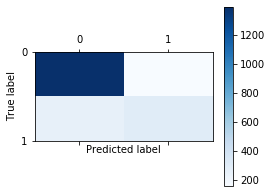

In [76]:
plt.matshow(confusion_matrix(y_pred_final['Churn'],y_pred_final['Pred_Churn']),cmap='Blues')
plt.colorbar(shrink=0.8)
plt.xticks(range(2))
plt.yticks(range(2))
plt.xlabel("Predicted label")
plt.ylabel("True label");

In [77]:
from sklearn.metrics import classification_report

print(classification_report(y_pred_final['Churn'],y_pred_final['Pred_Churn']))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1549
           1       0.66      0.54      0.59       561

    accuracy                           0.80      2110
   macro avg       0.75      0.72      0.73      2110
weighted avg       0.79      0.80      0.80      2110



## Plot the ROC Curve

In [78]:
from sklearn.metrics import roc_auc_score, roc_curve

In [79]:
roc_curve(y_pred_final['Churn'],y_pred_final['Pred_Churn'],drop_intermediate=False)

roc_auc_score(y_pred_final['Churn'],y_pred_final['Pred_Churn'])


0.7178387758648268

In [80]:
def rc_curve(actual,predicted):
    fpr,tpr,threshold=roc_curve(actual, predicted)
    auc=roc_auc_score(actual,predicted)
    plt.figure(figsize=(4,3))
    plt.plot(fpr,tpr,label='AUC: % 0.2f' % auc)
    plt.plot([0,1],[0,1],linestyle='dashed')
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.0])
    plt.legend(loc='lower right')
    plt.show()
    return(fpr, tpr, threshold)

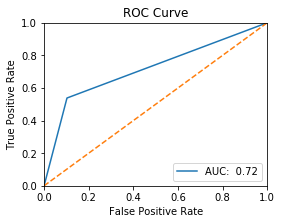

(array([0.        , 0.10264687, 1.        ]),
 array([0.        , 0.53832442, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [81]:
rc_curve(y_pred_final['Churn'],y_pred_final['Pred_Churn'])

## Let's find the optimat cut off point for Churn

In [82]:
n = [float(i/10) for i in range(10)]

for i in n:
    y_pred_final[i]= y_pred_final['Churn_Prob'].apply(lambda x: 1 if x > i else 0)


In [83]:
y_pred_final.head()

,customerID,Churn,Churn_Prob,Pred_Churn,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,6943,1,0.274383,0,1,1,1,0,0,0,0,0,0,0
1,6698,0,0.180391,0,1,1,0,0,0,0,0,0,0,0
2,5615,1,0.274503,0,1,1,1,0,0,0,0,0,0,0
3,4112,0,0.209146,0,1,1,1,0,0,0,0,0,0,0
4,5354,0,0.812676,1,1,1,1,1,1,1,1,1,1,0


Cut off  0.00


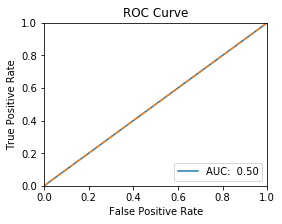

Cut off  0.10


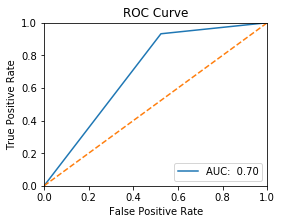

Cut off  0.20


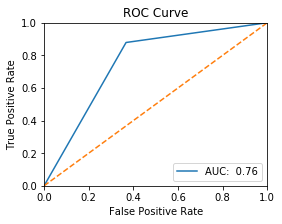

Cut off  0.30


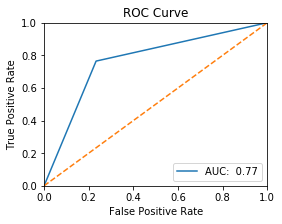

Cut off  0.40


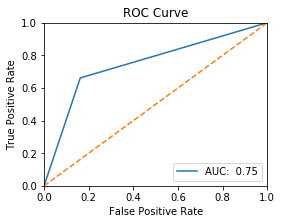

Cut off  0.50


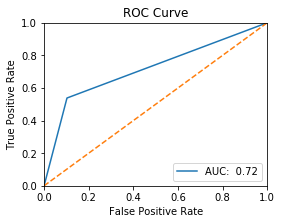

Cut off  0.60


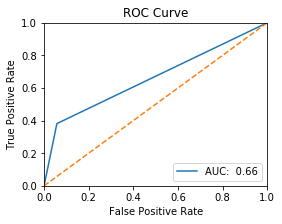

Cut off  0.70


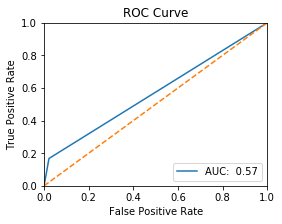

Cut off  0.80


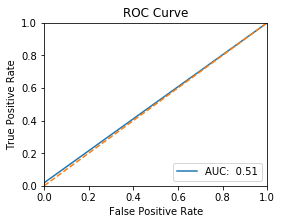

Cut off  0.90


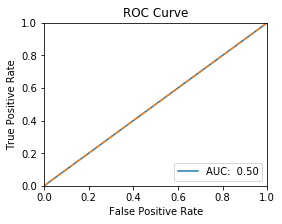

In [84]:
n = [float(i/10) for i in range(10)]

for i in n:
    print('Cut off % 0.2f' % i)
    rc_curve(y_pred_final['Churn'],y_pred_final[i])

#### From the curve above 0.3 is the optimal cut off

In [85]:
x=confusion_matrix(y_pred_final['Churn'],y_pred_final['Pred_Churn'])

In [86]:
x=confusion_matrix(y_pred_final['Churn'],y_pred_final['Pred_Churn'])
x[0][1]

159

In [87]:
# Let's calculate accuracy, sensitivity & specificity for each cut off

cutoff_df = pd.DataFrame(columns=['prob_cutoff','accuracy','sensitivity','specificity'])

n = [float(i/10) for i in range(10)]

for i in n:
    cm=confusion_matrix(y_pred_final['Churn'],y_pred_final[i])
    TP=cm[1][1]
    TN=cm[0][0]
    FP=cm[0][1]
    FN=cm[1][0]
    
    accuracy=(TP+TN)/(TP+TN+FP+FN)
    sensitivity=TP/(TP+FN)
    specificity=TN/(TN+FP)
    
    cutoff_df.loc[i*10]=[i,accuracy,sensitivity,specificity]

cutoff_df

,prob_cutoff,accuracy,sensitivity,specificity
0.0,0.0,0.265877,1.000000,0.000000
1.0,0.1,0.597630,0.932264,0.476436
2.0,0.2,0.698104,0.878788,0.632666
3.0,0.3,0.766351,0.764706,0.766946
4.0,0.4,0.790995,0.661319,0.837960
5.0,0.5,0.801896,0.538324,0.897353
6.0,0.6,0.793365,0.381462,0.942544
7.0,0.7,0.762559,0.167558,0.978050
8.0,0.8,0.738389,0.019608,0.998709
9.0,0.9,0.734123,0.000000,1.000000


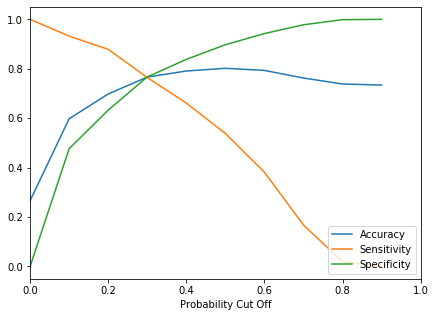

In [88]:
plt.figure(figsize=(7,5))

plt.plot(cutoff_df['prob_cutoff'],cutoff_df['accuracy'],label='Accuracy')
plt.plot(cutoff_df['prob_cutoff'],cutoff_df['sensitivity'],label='Sensitivity')
plt.plot(cutoff_df['prob_cutoff'],cutoff_df['specificity'],label='Specificity')
plt.xlim([0,1])
plt.xlabel('Probability Cut Off')
plt.legend(loc='lower right')
plt.show()


### From the above curve also 0.3 is the optimum cut off probability

In [89]:
y_pred_final['final_prediction']=y_pred_final['Churn_Prob'].apply(lambda x: 1 if x>0.3 else 0)

In [90]:
y_pred_final.head()

,customerID,Churn,Churn_Prob,Pred_Churn,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_prediction
0,6943,1,0.274383,0,1,1,1,0,0,0,0,0,0,0,0
1,6698,0,0.180391,0,1,1,0,0,0,0,0,0,0,0,0
2,5615,1,0.274503,0,1,1,1,0,0,0,0,0,0,0,0
3,4112,0,0.209146,0,1,1,1,0,0,0,0,0,0,0,0
4,5354,0,0.812676,1,1,1,1,1,1,1,1,1,1,0,1


In [91]:
from sklearn.metrics import accuracy_score

In [92]:
accuracy_score(y_pred_final['Churn'],y_pred_final['final_prediction'])

0.7663507109004739

In [93]:
confusion_matrix(y_pred_final['Churn'],y_pred_final['final_prediction'])

array([[1188,  361],
       [ 132,  429]], dtype=int64)

In [94]:
cutoff_df.loc[cutoff_df['prob_cutoff']==0.3]

,prob_cutoff,accuracy,sensitivity,specificity
3.0,0.3,0.766351,0.764706,0.766946


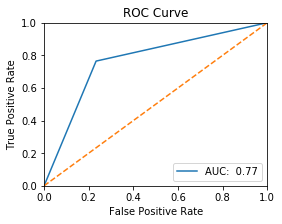

(array([0.        , 0.23305358, 1.        ]),
 array([0.        , 0.76470588, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [95]:
rc_curve(y_pred_final['Churn'],y_pred_final['final_prediction'])